In [ ]:
##!unzip "drive/MyDrive/Dog-Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog-Vision"

## End to End Multi-Class Dog Breed Classificatin

1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

4. Features
Some information about the data:

We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
There are 120 breeds of dogs (this means there are 120 different classes).
There are around 10,000+ images in the training set (these images have labels).
There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

Get Our Workspace ready

1.import tensorflow

2.import tensorflow_hub

3.check GPU is availabel or not

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("tensorflow virsion :", tf.__version__)
print("tensorflow_hub version:", hub.__version__)

# check GPU is available or not
print("GPU","available (Yesssssssssssss!!!!)" if tf.config.list_physical_devices("GPU") else "Not available :()")

tensorflow virsion : 2.18.0
tensorflow_hub version: 0.16.1
GPU available (Yesssssssssssss!!!!)


## Getting Our Data Ready(Converting into Tensors)

With all our ML models data needs to be numeric format.So we are converting our data into tensor(numerical representation)

In [ ]:
## start by accesing our data
import pandas as pd
label_csv=pd.read_csv("drive/MyDrive/Dog-Vision/labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

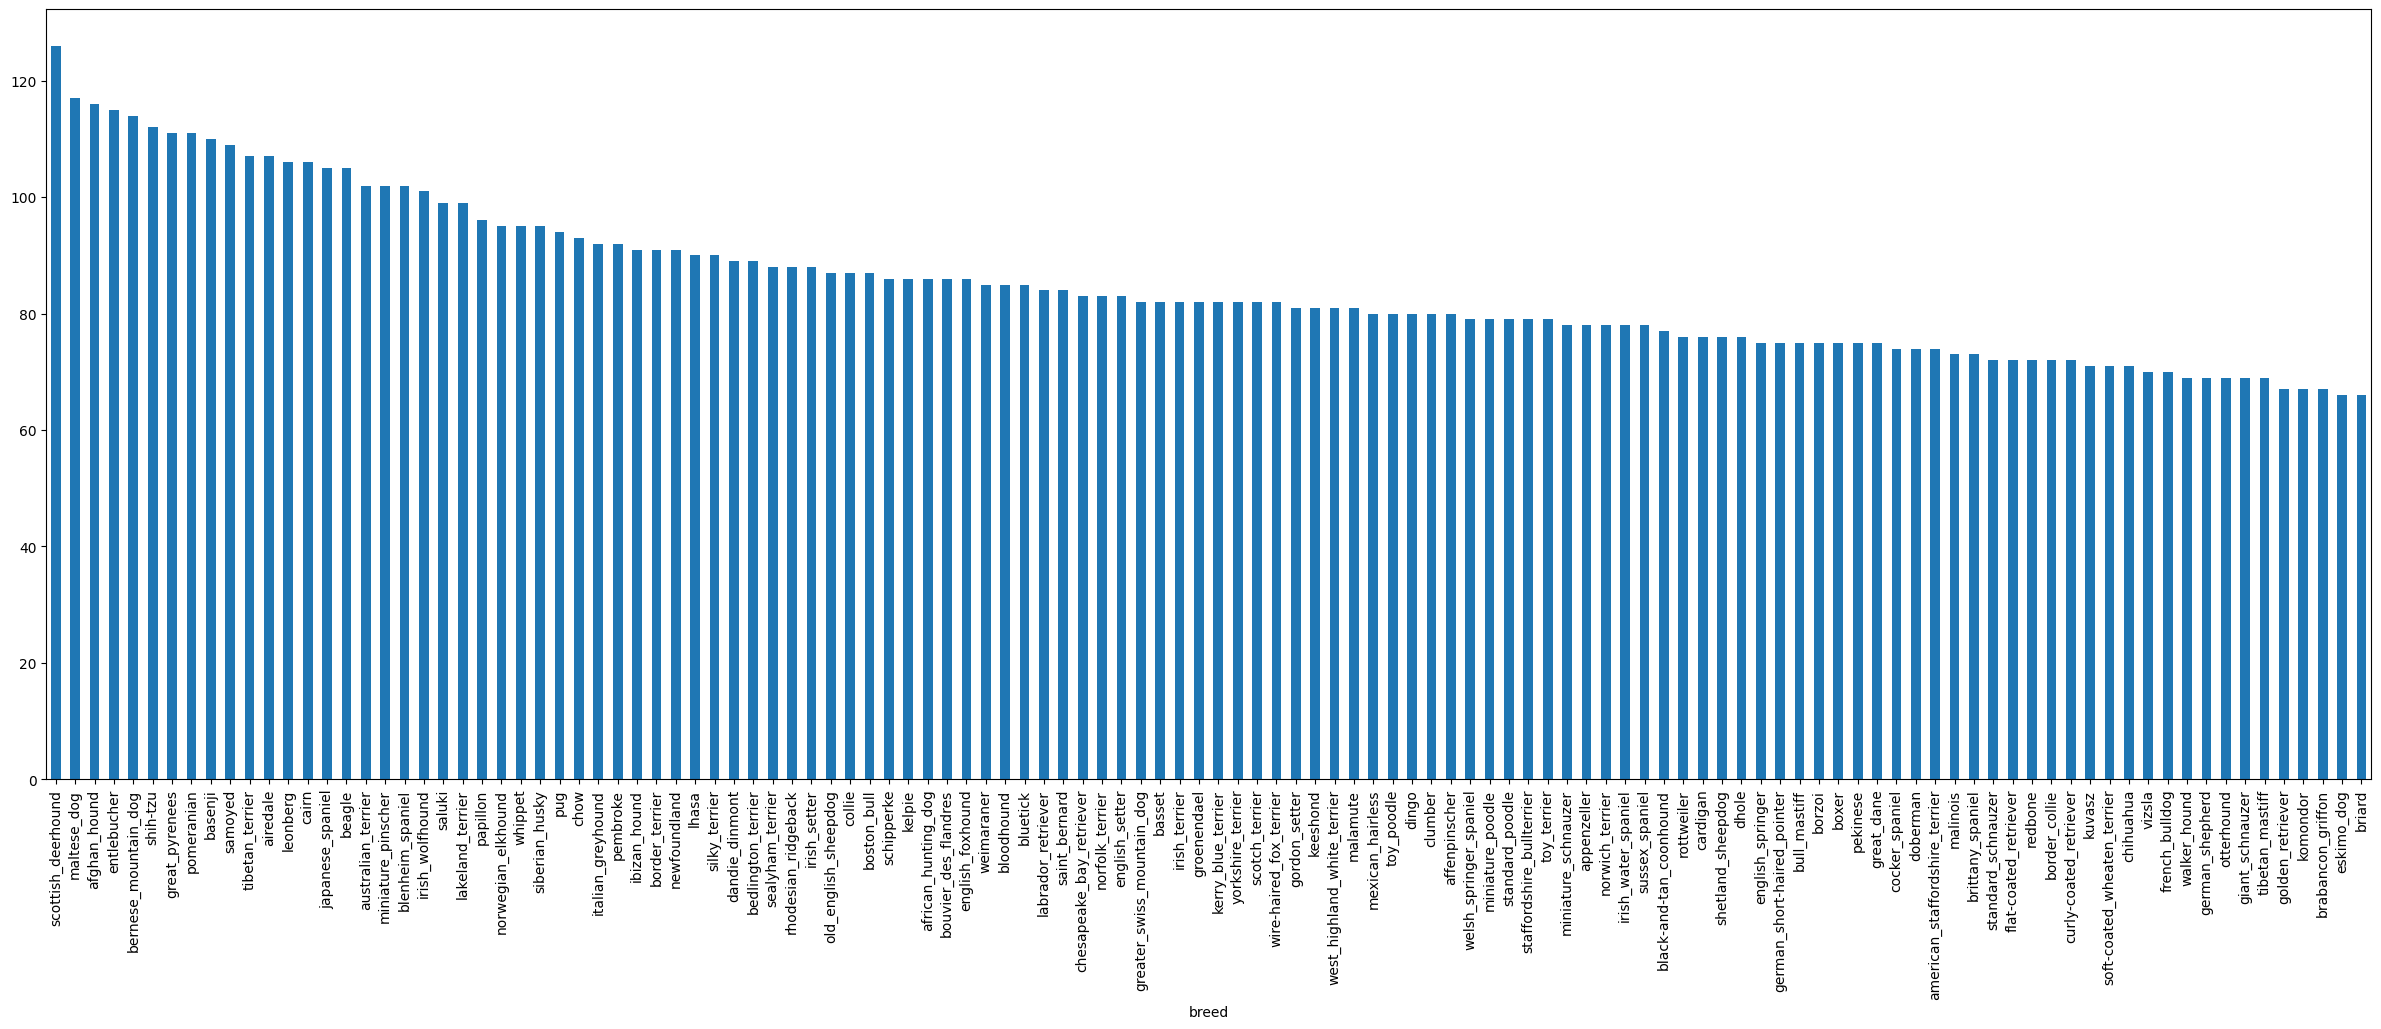

In [ ]:
label_csv["breed"].value_counts().plot.bar(figsize=(30,10))

In [ ]:
label_csv["breed"].value_counts().median()

82.0

In [ ]:
# lets veiw an Image
from IPython.display import Image
# Image("drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels

Let's get the list of all our image file pathname

In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# create pathnames from image ID's
filenames=["drive/MyDrive/Dog-Vision/train/" + fname + ".jpg" for fname in label_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether the filnames matchs the actual amount of images(Id) we have in traing data
import os
if len(os.listdir("drive/MyDrive/Dog-Vision/train/")) == len(filenames):
  print("Filenames matchs the amount of image id: Proceed")
else:
  print("Filesnames and image id don not match check the dir")

Filenames matchs the amount of image id: Proceed


In [ ]:
label_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
labels=label_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if number of labels matches the number of file names
if len(labels)==len(filenames):
  print("The number of labels matches the number of filenames :Procees")
else:
  print("the number of labels not matches the no. of filenames : Check the data directories")

The number of labels matches the number of filenames :Procees


In [ ]:
#find the unique labels
import numpy as np
unique_breeds= np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
# Turn a single label into ARRAY of boolean
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turning every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Creating Our Own Validation Set

since the dataset from kaggle dont have the validation set. we have to create our own validation set

In [ ]:
X=filenames
y=boolean_labels


In [ ]:
NUM_Images=1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X[:NUM_Images],
                                                 y[:NUM_Images],
                                                 test_size=0.2,
                                                 random_state=42)


In [ ]:
len(X_train),len(X_valid),len(y_train),len(y_valid)

(800, 200, 800, 200)

In [ ]:
X_train[:5],y_train[:2]

(['drive/MyDrive/Dog-Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog-Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog-Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog-Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog-Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing Images (Turning into Tensors)
to preprocess our images into tensors we are going to write funtion

1.take an image filepath as an input

2.use tensorflow to read the file and save it to variable,'images',

3.turn our 'image'(.jpg) into tensors

4.Normalize our 'images'(converting color cannel values from 0-255 to 0-1)

5.Resize the 'image' to be shape of (224,224)

6.Return the modified 'image'

Befor we proceed lets see what does importing an image looks like

In [ ]:
filenames[:43]

['drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog-Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog-Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dog-Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dog-Vision/train/006cc3ddb9dc1bd827479569fcdc52d

In [ ]:
# convert images to numpy array
from matplotlib.pyplot import imread
# image = imread('drive/MyDrive/Dog-Vision/train/011e06760794850c40f23d6426c40774.jpg')
image= imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(np.uint8(255), np.uint8(0))

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
tf.constant(image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we have seen what an image looks like in tensor,lets make a function to preprocess them.

we will create a function to,

1.Take an image filepath as input

2.Use TensorFlow to read the file and save it to a variable, image

3.Turn our image (a jpg) into Tensors

4.Normalize our image (convert color channel values from from 0-255 to 0-1).

5.Resize the image to be a shape of (224, 224)

6.Return the modified image


In [ ]:
# Define Image size
IMG_SIZE=224

#create a function to preprocess the image
def process_image(image_path,image_size=IMG_SIZE):
  """
  Take an image file path and convert image into tensor
  """
  # Read in an image file
  image= tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 color channel(Red,Blue,Green)
  image= tf.image.decode_jpeg(image,channels=3)
  # Convert the image channel values from 0-255 to 0-1
  image= tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image with our desired values(224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image


## Turning our data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: (image, label).

In [ ]:
# create a simple function to return tuple(image,label)
def get_image_label(image_path,label):
   """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
   image = process_image(image_path)
   return image,label

In [ ]:
# Demo of the above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: (image, label), let's make a function to turn all of our data (X & y) into batches!



In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
#Creating training and validation data batches
train_data= create_data_batches(X_train,y_train)
valid_data= create_data_batches(X_valid,y_valid,valid_data=True)

Creating training data batches...
Creating validation data batches...


## Visulazing the Data Batches
our data is in the batches,however it is difficult to understand and comphetend so lets visulazie it


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

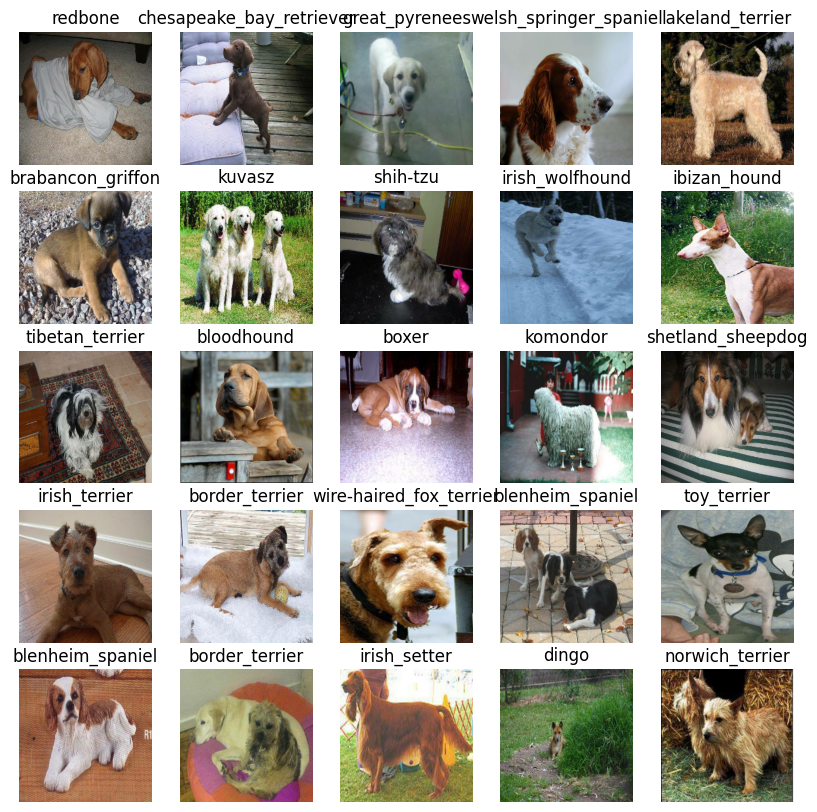

In [ ]:
# Now lets visualize the data in training batch
train_images,train_labels= next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

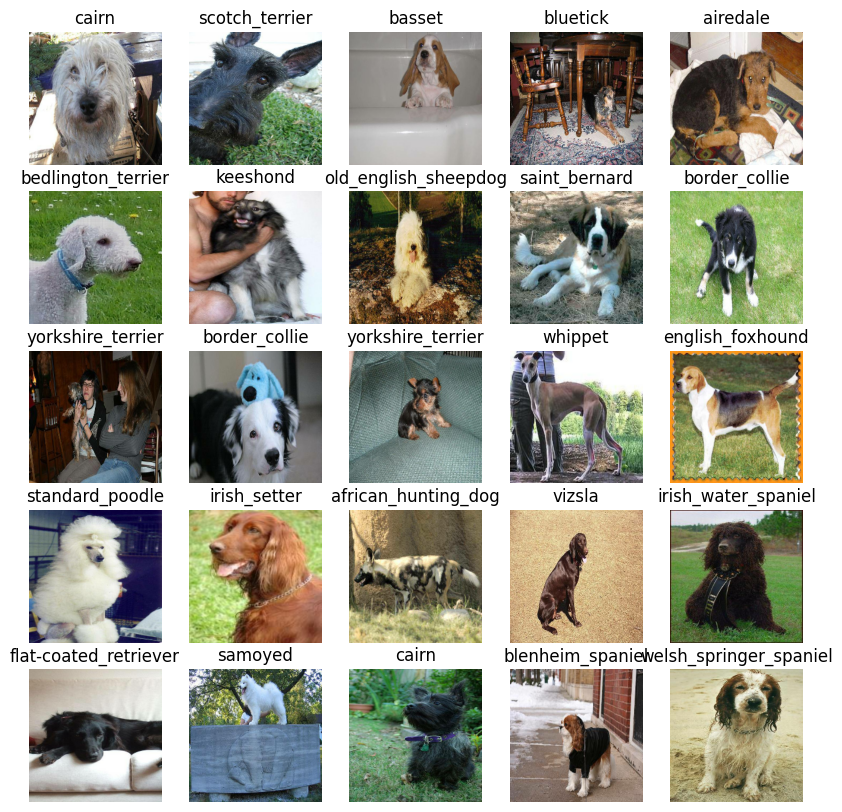

In [ ]:
# Now lets visulazie our Validation data
val_images,val_labels= next(valid_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a Model

before building a modle,there are few thing we need to define

1.the input shape(our images shape,in the form of tensors) to our model.

2.the output shape(image labels,in the form of tensors) to our model.

3.the URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
IMG_SIZE

224

In [ ]:
# setup input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] # BATCH height weadth color channel

# setup output shape to the model
OUTPUT_SHAPE= len(unique_breeds)

# Setup model URL from TensorFlow Hub
# MODEL_URL="https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"
# MODEL_URL="google/mobilenet-v2/tensorFlow2/035-128-classification"
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
# MODEL_URL ="https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-classification/2"

In [ ]:
# pip install --upgrade tensorflow tensorflow-hub

In [ ]:
INPUT_SHAPE,train_labels[0].shape

([None, 224, 224, 3], (120,))

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

1.Takes the input shape, output shape and the model we've chosen as parameters.

2.Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).

3.Compiles the model (says it should be evaluated and improved).

4.Builds the model (tells the model the input shape it'll be getting).

5.Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [ ]:
# Important library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers




In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

base_model=tf.keras.applications.EfficientNetV2B0(include_top=False)
# freeze the base model
base_model.trainable=False
#Create inputs into our model
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
#if using resnet50_v2 we need to normalize inputs:
# x=tf.keras.layers.exprimental.preprocessing.Rescaling(1./255)(inputs)
# pass the inputs to base model
x=base_model(inputs)
# Average pool the output of the model

x=tf.keras.layers.GlobalAveragePooling2D(name="Global_average")(x)
# Create a output activation layer
outputs=tf.keras.layers.Dense(120,activation="softmax",name="output_layer")(x)
# combine the inputs with outputs into the model
model=tf.keras.Model(inputs,outputs)

# Compile a model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history=model.fit(train_data,
                  epochs=20,
                  steps_per_epoch=len(train_data),
                  validation_data=valid_data,
                  validation_steps=len(valid_data))


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 625ms/step - accuracy: 0.0191 - loss: 4.9445 - val_accuracy: 0.0000e+00 - val_loss: 4.9971
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.0082 - loss: 4.8025 - val_accuracy: 0.0000e+00 - val_loss: 4.9519
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.0135 - loss: 4.7638 - val_accuracy: 0.0000e+00 - val_loss: 4.9507
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.0136 - loss: 4.7609 - val_accuracy: 0.0050 - val_loss: 4.9203
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.0092 - loss: 4.7840 - val_accuracy: 0.0200 - val_loss: 4.9523
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.0135 - loss: 4.7579 - val_accuracy: 0.0050 - val_loss: 4.9435
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.0177 - loss: 4.7837 - val_accuracy: 0.0000e+00 - val_loss: 4.9387
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_average                  │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,719,146 (10.37 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 307,442 (1.17 MB)

## Creating callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

## TensorBoard Callback
TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

Load the TensorBoard notebook extension.

Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.

Visualize the our models training logs using the %tensorboard magic

function (we'll do this later on).

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS (also known as number of epochs).

NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If NUM_EPOCHS=1, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for NUM_EPOCHS?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set NUM_EPOCHS to 100 but our model stops improving after 22 epochs, it'll stop training.

Along with this, let's quickly check if we're still using a GPU.

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}


## Boom! We've got a GPU running and NUM_EPOCHS setup. Let's create a simple function which trains a model. The function will:

Create a model using create_model().

Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).

Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.

Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
base_model=tf.keras.applications.MobileNetV2(include_top=False)

# freeze the layers
base_model.trainable=False
# Create inputs
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# put the inputs into the model
x=base_model(inputs)

# Add average pool teh output of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average")(x)

# Create outputs
outputs=tf.keras.layers.Dense(120,activation="softmax",name="output_layer")(x)

# combine the inputs and outputs
model_1=tf.keras.Model(inputs,outputs)

## Compile a model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# Create new TensorBoard session everytime we train a model
tensorboard = create_tensorboard_callback()

# Fit the model to the data passing it the callbacks we created
history_1=model_1.fit(x=train_data,
          epochs=NUM_EPOCHS,
          steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_freq=1, # check validation metrics every epoch
          callbacks=[tensorboard, early_stopping])

<ipython-input-70-5e7d5adad886>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=tf.keras.applications.MobileNetV2(include_top=False)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.0499 - loss: 4.7917 - val_accuracy: 0.2300 - val_loss: 3.6387
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.6202 - loss: 2.1964 - val_accuracy: 0.4650 - val_loss: 2.4500
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.9138 - loss: 0.9365 - val_accuracy: 0.5800 - val_loss: 1.9657
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9833 - loss: 0.4923 - val_accuracy: 0.5800 - val_loss: 1.7716
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.9918 - loss: 0.3030 - val_accuracy: 0.6350 - val_loss: 1.6652
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9985 - loss: 0.1960 - val_accuracy: 0.6350 - val_loss: 1.6249
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.9985 - loss: 0.1538 - val_accuracy: 0.6350 - val_loss: 1.5900
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.9986 - loss: 0.1213 - val_acc

In [ ]:
model_1.evaluate(valid_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6910 - loss: 1.4391


[1.5004081726074219, 0.6549999713897705]

<Axes: >

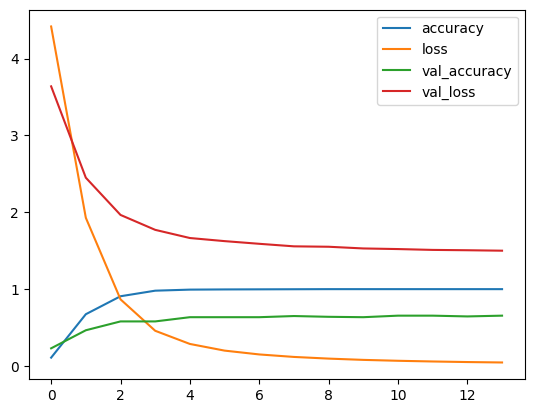

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.DataFrame(history_1.history).plot()

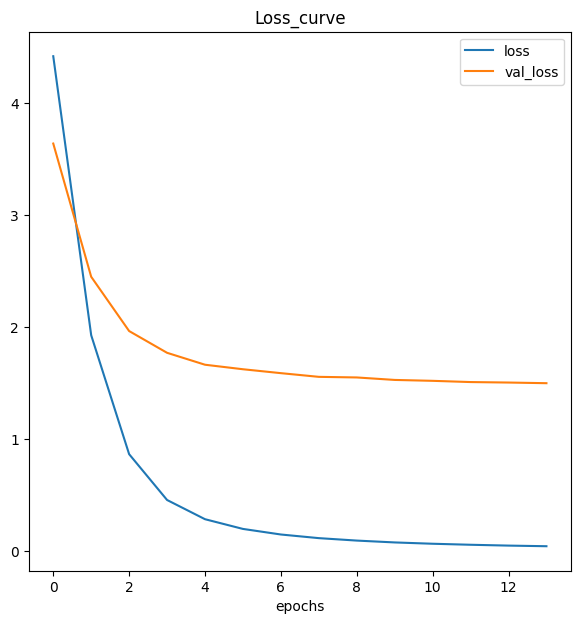

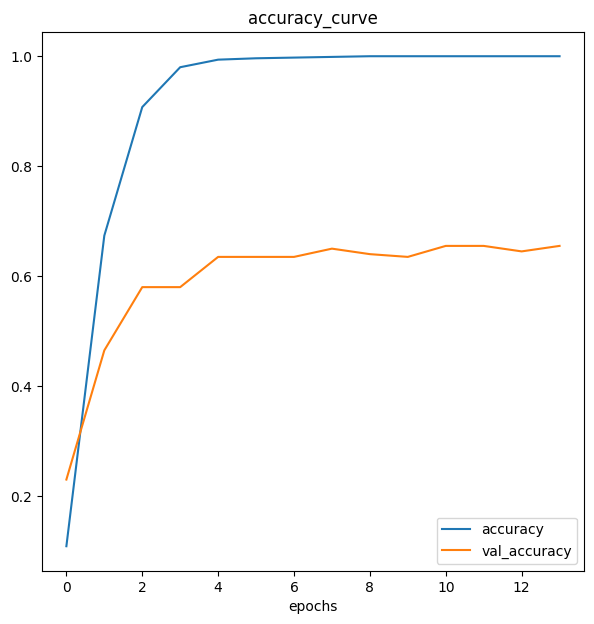

In [ ]:
## plotting separate loss curves

loss=history_1.history["loss"]
val_loss=history_1.history["val_loss"]

accuracy=history_1.history["accuracy"]
val_accuracy=history_1.history["val_accuracy"]

epochs=range(len(history_1.history["loss"]))

# plot the loss curve
plt.figure(figsize=(7,7))
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("Loss_curve")
plt.xlabel("epochs")
plt.legend()

plt.figure(figsize=(7,7))
plt.plot(epochs,accuracy,label="accuracy")
plt.plot(epochs,val_accuracy,label="val_accuracy")
plt.title("accuracy_curve")
plt.xlabel("epochs")
plt.legend()